In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [40]:
file_path = "/content/WineQT.csv"
df = pd.read_csv(file_path)

In [41]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [44]:
# Check if any values are missing
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [45]:
# Remove the 'Id' column because it does not affect wine quality
df = df.drop("Id", axis=1)

#Explore the Data (EDA)

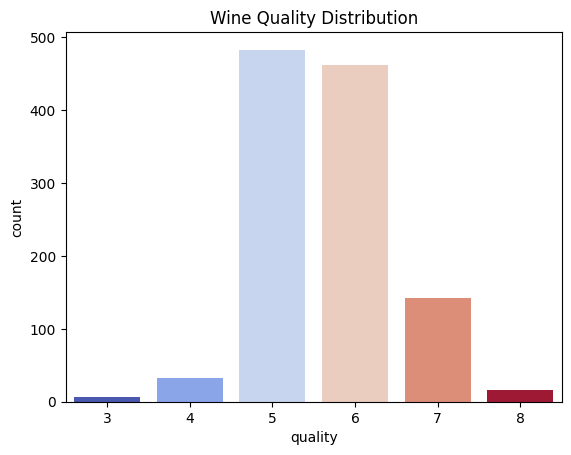

In [46]:
# Count how many wines fall into each quality level
sns.countplot(x="quality", data=df,hue="quality", palette="coolwarm",legend=False)
plt.title("Wine Quality Distribution")
plt.show()

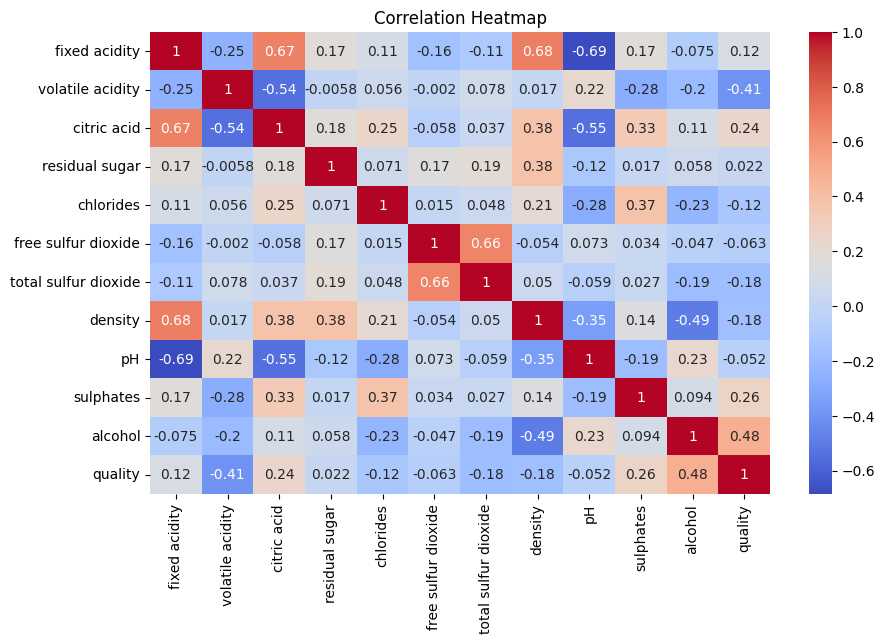

In [47]:
#how columns are related to each other
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


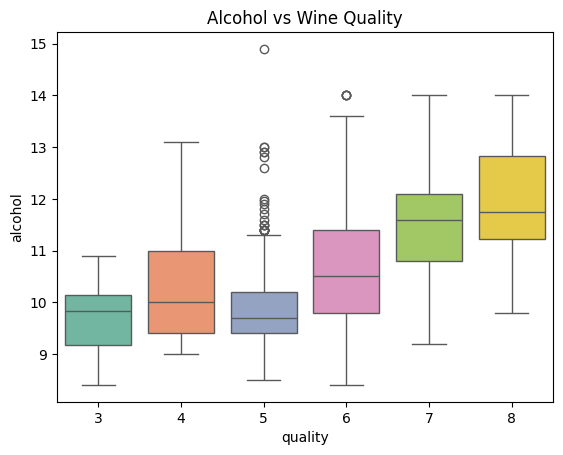

In [48]:
# Alcohol vs Wine Quality
sns.boxplot(x="quality", y="alcohol", data=df, hue="quality", palette="Set2", legend=False)
plt.title("Alcohol vs Wine Quality")
plt.show()


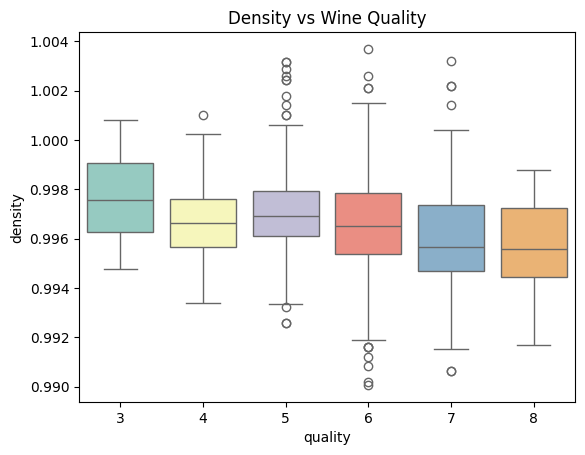

In [49]:
# Density vs Wine Quality
sns.boxplot(x="quality", y="density", data=df, hue="quality", palette="Set3", legend=False)
plt.title("Density vs Wine Quality")
plt.show()

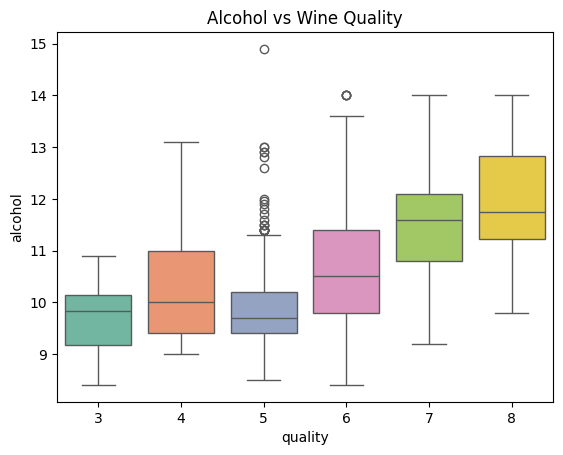

In [50]:
#Compare alcohol content with wine quality
sns.boxplot(x="quality", y="alcohol", data=df, palette="Set2", hue="quality", legend=False)
plt.title("Alcohol vs Wine Quality")
plt.show()

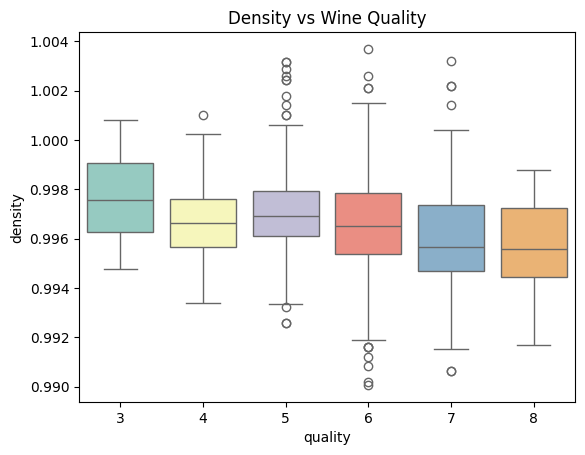

In [51]:
# Density vs Wine Quality
sns.boxplot(x="quality", y="density", data=df, hue="quality", palette="Set3", legend=False)
plt.title("Density vs Wine Quality")
plt.show()

#Prepare Data for Machine Learning

In [52]:
X = df.drop("quality", axis=1)
y = df["quality"]

# Split into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale/normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Train Models

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Random Forest with balanced class weight
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 2. SGD Classifier with balanced class weight
sgd = SGDClassifier(random_state=42, class_weight="balanced")
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

# 3. Support Vector Classifier (SVC) with balanced class weight
svc = SVC(random_state=42, class_weight="balanced")
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

#Evaluate Models


Random Forest (Balanced) Results:
Accuracy: 0.6812227074235808
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.80      0.75        97
           6       0.64      0.68      0.66        92
           7       0.74      0.48      0.58        29
           8       1.00      0.33      0.50         3

    accuracy                           0.68       229
   macro avg       0.51      0.38      0.42       229
weighted avg       0.66      0.68      0.66       229



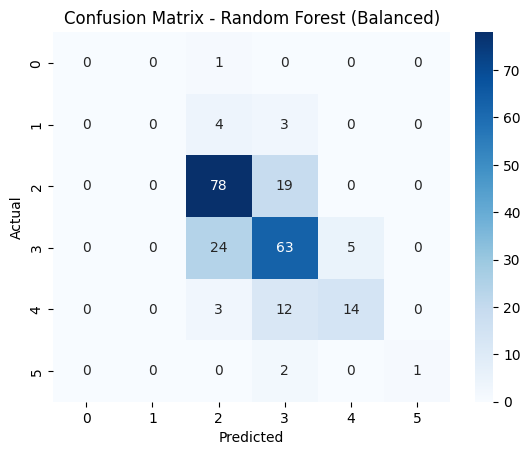


SGD Classifier (Balanced) Results:
Accuracy: 0.5327510917030568
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.14      0.18         7
           5       0.70      0.64      0.67        97
           6       0.58      0.57      0.57        92
           7       0.25      0.17      0.20        29
           8       0.11      0.67      0.18         3

    accuracy                           0.53       229
   macro avg       0.31      0.36      0.30       229
weighted avg       0.57      0.53      0.55       229



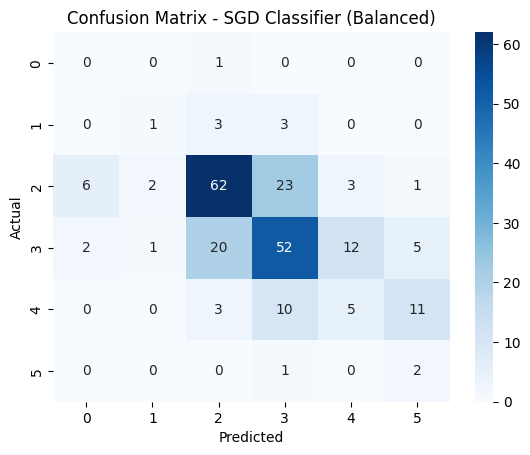


SVC (Balanced) Results:
Accuracy: 0.5458515283842795
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.29      0.18         7
           5       0.72      0.73      0.73        97
           6       0.64      0.40      0.49        92
           7       0.37      0.48      0.42        29
           8       0.06      0.33      0.11         3

    accuracy                           0.55       229
   macro avg       0.32      0.37      0.32       229
weighted avg       0.61      0.55      0.57       229



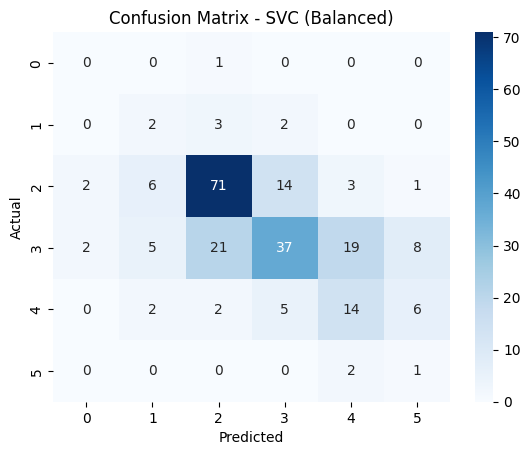

In [57]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each model again
evaluate_model("Random Forest (Balanced)", y_test, rf_pred)
evaluate_model("SGD Classifier (Balanced)", y_test, sgd_pred)
evaluate_model("SVC (Balanced)", y_test, svc_pred)

#Compare Model Accuracy

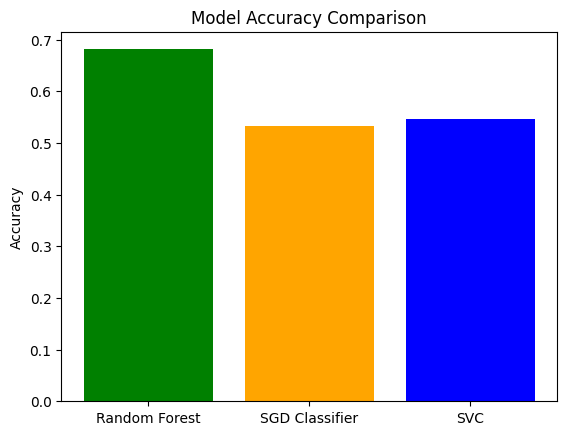

In [55]:
# Collect results
results = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SGD Classifier": accuracy_score(y_test, sgd_pred),
    "SVC": accuracy_score(y_test, svc_pred)
}

# Plot bar chart
plt.bar(results.keys(), results.values(), color=['green','orange','blue'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

#Feature Importance (Random Forest)

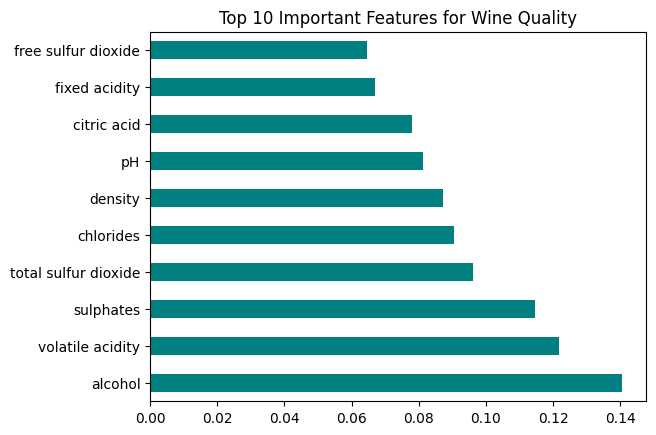

In [56]:
# Top 10 important features for wine quality?
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color="teal")
plt.title("Top 10 Important Features for Wine Quality")
plt.show()
